### The Generalized Inverse and the Penrose Equations

The generalized inverse of a generic matrix $\mathbf{A}$ was the subject
of a lecture by Professor E. H. Moore on the occasion of the Fourteenth
Western Meeting of the American Mathematical Society in 1920 . We find
some details of Moore’s work on the *generalized reciprocal* of
nonsingular nonsquare matrices in a two-page summary of the lecture.
Generalized inverses were rediscovered by R. Penrose decades later and
published with a much more clear notation in 1955. The account in this
section is short and only touches the definition according to the
original papers by Moore and Penrose. We will further the discussion on
the topic later, where we will take advantage of the **PLU**
decomposition of a generic matrix in the context of solving systems of
simultaneous equations.

#### Definition

*We define* the generalized inverse of a matrix $\mathbf{A}$ *as the
matrix* $\mathbf{A}^{\dagger}$ *that satisfies the following set of
equations, known as the* Penrose *equations*:

$$\begin{aligned}
    \mathbf{A} \mathbf{A}^{\dagger} \mathbf{A} &= \mathbf{A} \\
    \mathbf{A}^{\dagger} \mathbf{A} \mathbf{A}^{\dagger} &= \mathbf{A}^{\dagger} \\
    (\mathbf{A} \mathbf{A}^{\dagger})^{\top} &= \mathbf{A} \mathbf{A}^{\dagger} \\
    (\mathbf{A}^{\dagger} \mathbf{A})^{\top} &= \mathbf{A}^{\dagger} \mathbf{A}
\end{aligned}$$

Both Moore and later Penrose stated and proved that
$\mathbf{A}^{\dagger}$ is unique, and in their honor many authors refer
to $\mathbf{A}^{\dagger}$ as the *Moore–Penrose inverse*. Notice that if
$\mathbf{A}$ is square and nonsingular, then
$\mathbf{A}^{\dagger} = \mathbf{A}^{-1}$. For a complete discussion of
the generalized inverse and its applications, the reader is referred to
\[?\] and the extensive reference list therein.

### Beamforming Antennas

**Beamforming** is the most commonly used method by a new generation of smart antennas. In this method, an array of antennas is used to “steer” (**steering vector**) or transmit radio signals in a **specific direction**, rather than simply broadcasting energy/signals in all directions inside the sector. In this method, multiple smaller antennas control the direction of the combined transmitted signal by appropriately **weighing the magnitude** and phase of each of the smaller antenna signals. In this technique, the phase and amplitude of the transmitted signal of each component antenna are adjusted as needed, resulting in a constructive or destructive effect, concentrating the total transmitted signal into a targeted beam.  

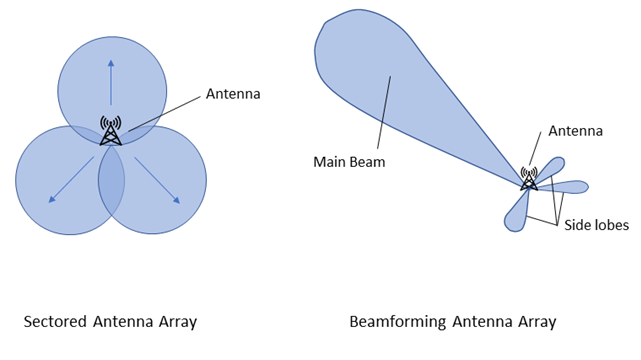  

By changing the phase of the individual signals in an antenna array the beam can be formed at an angle. The plane wave can then be directed in the desired direction. 

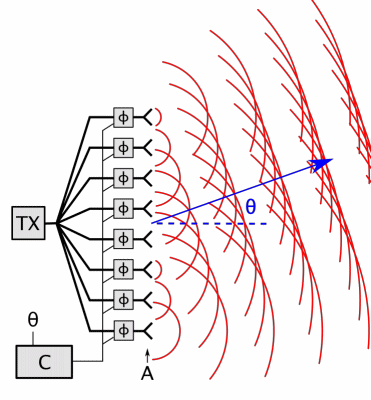

Now let's talk a bit more about the **Array Steering Vector**.   

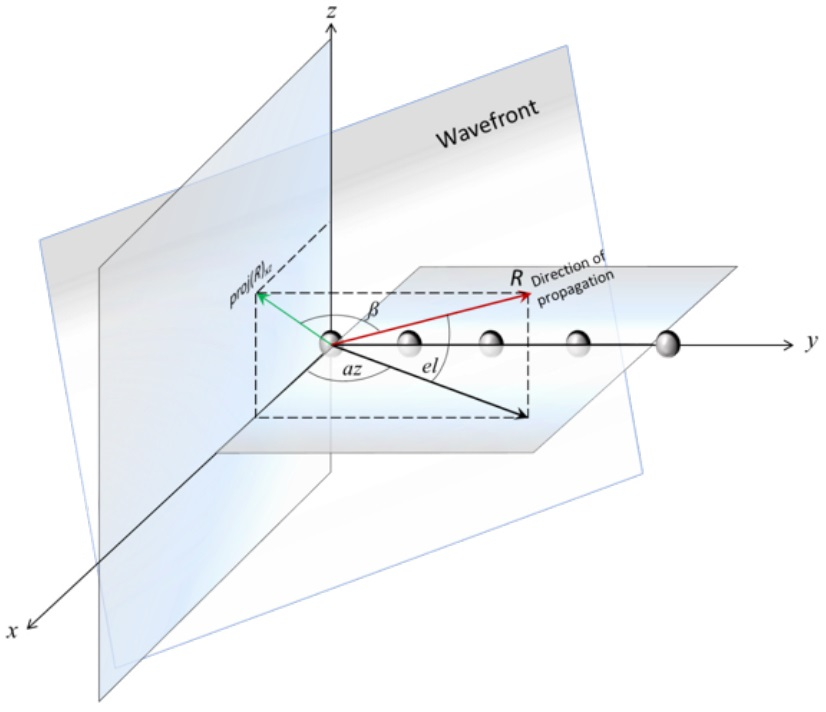  

Consider a plane wave propagating in free space with carrier **e^j2πfot** modulated by a signal of interest **s(t)**. The distance travelled by a given wavefront to successive array elements depends on the angle of arrival (**AoA**), broadside angle **β**, creating a time delay **τ=dsin(β)/c**, where **c** is the speed of the wave, nominally the speed of light. The vector of signals **s(t)** induced into the antenna feed network from the array elements is given by the equation bellow.  

$$
\mathbf{s}(t) = \alpha s(t - N\tau) e^{j 2 \pi f_0 (t - N\tau)}
$$

The signal vector **s(t)** from the **N** elements of the array can be expressed as shown below, where **a(β)** is known as the array steering vector and **λ** the wavelength of the carrier in free space.  

$$
\mathbf{s}(t) = s(t) 
\begin{bmatrix}
1 \\
e^{-j \frac{2\pi d \sin(\beta)}{\lambda}} \\
e^{-j \frac{4\pi d \sin(\beta)}{\lambda}} \\
e^{-j \frac{6\pi d \sin(\beta)}{\lambda}} \\
\vdots \\
e^{-j (N-1)\frac{2\pi d \sin(\beta)}{\lambda}}
\end{bmatrix}
\quad \text{Array steering vector } \rightarrow \mathbf{a}(\beta)
$$

The goal of Beamforming is to find a set of **complex weights w** to optimize some parameter such as signal-to-noise ratio. We use the Generalized Inverse to calculate the optimal weights **w**.  

$$w=A^† d$$

In the absence of noise and interference, the trivial solution is the set of weights that will null the phase of each complex exponential term in the steering vector **a(β)**, resulting in signals that are perfectly in-phase with each other across the array, thereby maximizing the signal of interest. This can be accomplished by **multiplying each component signal of s(t) by a complex weight w** which is the conjugate of each term of a(β). Summing these in-phase signals will result in **constructive interference that will amplify the signal at the angle of arrival β**. Expressed mathematically this is the product of the input signal **s(t)** impinging on the array and the inner product of the steering vector **a(β)** with its conjugate transpose.  

$$
y(t) = s(t) \cdot \mathbf{w}^H \mathbf{a}(\beta)
$$
Note that wH is a row vector; **a(β)** a column vector. Their inner product **<wH,a(β)>** is a scalar gain factor that is applied to the signal **s(t)** at the angle of arrival **β**. Setting w equal to a provides gain factor of **N**, the number of antennas in the array.  

This interactive example shows beamforming with antenna arrays, where a desired signal is received from a specific direction while interference from another direction is suppressed. The optimal weights for the antenna elements are computed using the **Moore–Penrose pseudoinverse**, allowing us to form a beam pattern with a main beam and a null. Try changing the desired signal angle and the noise angle, understand what happens on the plot.

In [2]:
%pip install -q ipywidgets==8.0.7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import scipy.linalg

In [27]:
#Global variables
c = 3e8  # speed of light [m/s]
f = 1e9  # frequency [Hz]
wavelength = c / f
k = 2 * np.pi / wavelength  # wave number
N = 8  # number of antenna elements
d = wavelength / 2  # spacing between antennas
angles = np.linspace(-90, 90, 1000)  # observation angles in degrees
angles_rad = np.deg2rad(angles)

# Array steering vector
def steering_vector(theta_deg):
    theta_rad = np.deg2rad(theta_deg)
    return np.exp(-1j * k * d * np.arange(N) * np.sin(theta_rad))

# Desired direction and beamformer computation
def plot_beamforming(desired_angle, interference_angle):
    a_desired = steering_vector(-(desired_angle))
    a_interf = steering_vector(interference_angle)
    A = np.column_stack([a_desired, a_interf])
    d_vec = np.array([1, 0], dtype=complex))
    
    # Compute optimal weights using generalized inverse and penrose equations
    w = np.linalg.pinv(A.T.conj()) @ d_vec  # result shape (N,)

    # Array response over all angles
    response = np.array([np.abs(w @ steering_vector(theta)) for theta in angles])
    response /= np.max(response)  # normalize

    plt.figure(figsize=(10, 5))
    plt.plot(angles, response, lw=2)
    plt.title(f"Beamforming Pattern\n(Main Beam at {desired_angle}°, null at {interference_angle}°)")
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Normalized Array Response")
    plt.grid(True)
    plt.ylim(0, 1.1)
    plt.show()
    
interact(plot_beamforming, desired_angle=FloatSlider(min=-90, max=90, step=1, value=30, description="Signal Angle (°)"), 
         interference_angle=FloatSlider(min=-90, max=90, step=1, value=-20, description="Noise Angle (°)"))

interactive(children=(FloatSlider(value=30.0, description='Signal Angle (°)', max=90.0, min=-90.0, step=1.0), …

<function __main__.plot_beamforming(desired_angle, interference_angle)>

**Question**: What happens to the signal response next to the desired angle? What happens to the signal next to the noise angle? 

#### Sources:

https://verkotan.com/2021/beamforming-antennas-how-they-work-and-are-tested/  
https://my.avnet.com/silica/resources/article/beamforming-fundamentals-to-implementation/

<br>
<p style="text-align:left;">
    <a href="2.5 -  REVISITING BASIS OF VECTOR SPACES.ipynb">⬅️PREVIOUS</a>
    <span style="float:right;">
        <a href="3.1 - METRICS, DISTANCES AND NORMS.ipynb" >NEXT➡️</a>
    </span>
</p>